In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [2]:
X = load_boston().data
Y = load_boston().target
boston = load_boston()


In [3]:
#scaler_X_train = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
#X_train, X_CV, Y_train, Y_CV = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 6)
Y_train = np.reshape(Y_train,(339,1))
Y_test = np.reshape(Y_test,(167,1))
#Y_CV = np.reshape(Y_CV,(112,1))

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Y_train = scaler.fit_transform(Y_train[:, None])[:, 0]
#Y_test = scaler.transform(Y_test[:, None])[:, 0]

Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)


In [14]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=10000, eta0=0.001)
clf.fit(X_train, Y_train)

mean_squared_error(Y_test, clf.predict(X_test))

0.35749290873804696

##### To implement Stochastic Gradient Descent. We have to consider figuring out 

    n
   $ min ∑( y_i-W^Tx_i-b)^2 $  = L(w,b)     
         i=1    

##### y(i) = Actual Output;
##### $W^T$ = Vector W Transpose;
##### x(i) = Training Data;
##### b = Intercept;

##### Now we know that to figure solve above equation is equivalent to figuring out

 w<sub>j+1 </sub>= w<sub>j</sub> - r*(∂L/∂W)<sub>w</sub><sub>j</sub>
 
 
 w<sub>b+1</sub> = w<sub>j</sub> - r*(∂L/∂b)<sub>w</sub><sub>b</sub>
 
 such that  w<sub>j+1 </sub>≈  w<sub>j </sub>
                  and
 such that  b<sub>j+1 </sub>≈  b<sub>j </sub>
 
 ##### where r = learning rate
 
 ##### Given that:
              n
              
 ∂L/∂W = ∑ (-2x<sub>i</sub>)( y<sub>i</sub>-W<sup>T</sup>x<sub>i</sub>-b)
 
              i=1      
  
               n
               
∂L/∂b =  ∑ (-2)( y<sub>i</sub>-W<sup>T</sup>x<sub>i</sub>-b)

               i=1     
 


#### Lets define a loss function which is:

##### loss = (y_actual - y_predicted)<sup>2</sup>


In [15]:
def loss(w,b):
    n = X_train.shape[0]
    prediction = np.matmul(X_train, w) + b
    final_loss = mean_squared_error(Y_train, prediction)
    error = (Y_train-prediction)
    #print(final_loss, prediction.shape, error.shape, np.matmul(X_train.T, error).shape)
    
    m_deriv = (-2/n) * np.matmul(X_train.T, error)
    b_deriv = (-2) * np.mean(error)
    return [final_loss,m_deriv,b_deriv]

In [16]:
wj = np.zeros((13,1))
bj =  0

m_deriv = []
b_deriv = []
r = 0.1

for i in range(10000):
    results = loss(wj,bj)
    wj = wj - r*(results[1])
    bj = bj - r*(results[2])
final_wj = wj
final_bj = bj

In [17]:
prediction_test = np.matmul(X_test, final_wj) + final_bj
prediction_train = np.matmul(X_train, final_wj) + final_bj

##### 3. Plot a chart of predicted values Vs actual values of your own SGD Implementation

In [18]:
train_lst_actual = Y_train.tolist()
test_lst_actual = Y_test.tolist()

In [19]:
test_own_sgd_pred_lst = prediction_test.tolist()
train_own_sgd_pred_lst = prediction_train.tolist()

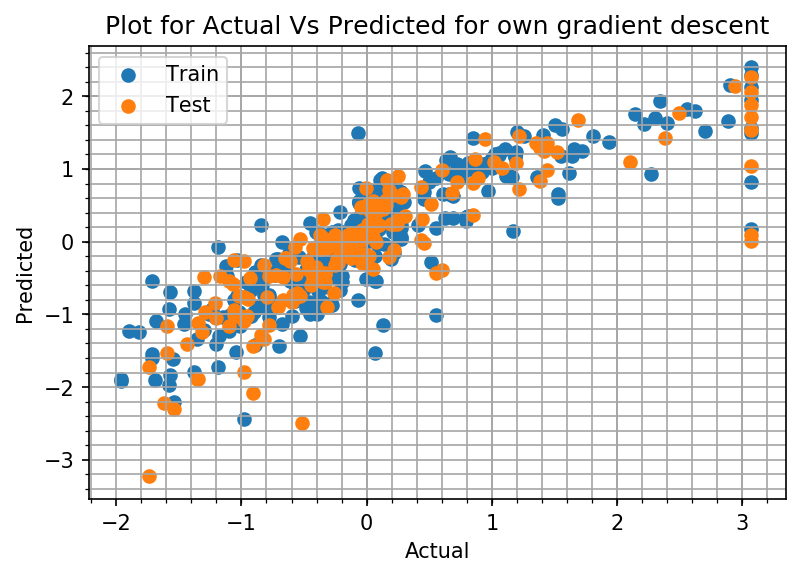

In [20]:
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.scatter(train_lst_actual, train_own_sgd_pred_lst)
plt.scatter(test_lst_actual, test_own_sgd_pred_lst)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Plot for Actual Vs Predicted for own gradient descent")
plt.legend(['Train', 'Test'], loc='upper left')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

##### 4. Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values


In [21]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=10000, eta0=0.001)
clf.fit(X_train, Y_train)
test_sklearn_sgd_pred_lst = (clf.predict(X_test)).tolist()
train_sklearn_sgd_pred_lst = (clf.predict(X_train)).tolist()


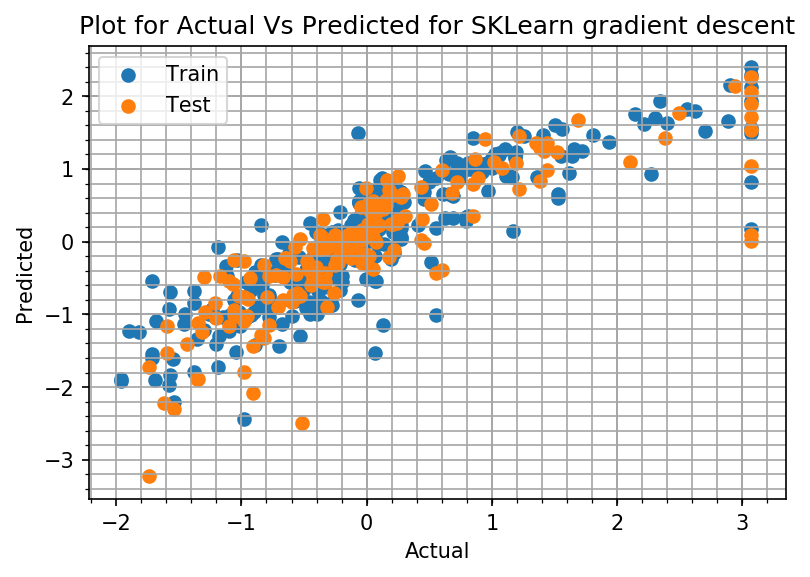

In [22]:
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.scatter(train_lst_actual, train_sklearn_sgd_pred_lst)
plt.scatter(test_lst_actual, test_sklearn_sgd_pred_lst)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Plot for Actual Vs Predicted for SKLearn gradient descent")
plt.legend(['Train', 'Test'], loc='upper left')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

##### 5. In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.


In [23]:
print ("The coefficeint using our own Gradient Descent/SGD for all features to get the equation of plane we looking for are")
print (final_wj) 
print ("The scalar intercept using our own Gradient Descent/SGD for plane we are looking is")
print (final_bj)
print ("######################################")
print ("The coefficeint using our SKLearn Gradient Descent/SGD for all features to get the equation of plane we looking for are")
print (clf.coef_)
print ("The scalar intercept using our SKLearn Gradient Descent/SGD for plane we are looking is")
print (clf.intercept_)

The coefficeint using our own Gradient Descent/SGD for all features to get the equation of plane we looking for are
[[-0.14683794]
 [ 0.09646572]
 [-0.01871308]
 [ 0.02121859]
 [-0.16638628]
 [ 0.3124183 ]
 [-0.03664171]
 [-0.31026098]
 [ 0.33305279]
 [-0.25437833]
 [-0.23882117]
 [ 0.11846488]
 [-0.37326509]]
The scalar intercept using our own Gradient Descent/SGD for plane we are looking is
-1.3204776505276178e-16
######################################
The coefficeint using our SKLearn Gradient Descent/SGD for all features to get the equation of plane we looking for are
[-0.14674825  0.09634619 -0.01906853  0.02126261 -0.16627345  0.31246848
 -0.03670551 -0.31020453  0.33179479 -0.25307106 -0.23877009  0.11843234
 -0.37318831]
The scalar intercept using our SKLearn Gradient Descent/SGD for plane we are looking is
[2.8452747e-06]


##### 6. Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.

In [24]:
print ("Mean Square Error for SKlearn SGD implementation is ")
print (mean_squared_error(Y_test, clf.predict(X_test)))
print ("Mean Square Error for our own GD implementation is ")
print (mean_squared_error(Y_test, prediction_test))

Mean Square Error for SKlearn SGD implementation is 
0.3575270518093782
Mean Square Error for our own GD implementation is 
0.35754425291162006
